In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from datetime import datetime

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def parser(x):
	return datetime.strptime(x, '%Y-%m-%d')

In [ ]:
example = parser('1995-01-10')

example

datetime.datetime(1995, 1, 10, 0, 0)

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/Datasets/birth.csv', header=0, parse_dates=[0], index_col=0, squeeze=False, date_parser=parser)

dataset.head()

# Output berbentuk Series, bukan DataFrame (karena nilai squeeze=True)

,Births
Date,
1959-01-01,35
1959-01-02,32
1959-01-03,30
1959-01-04,31
1959-01-05,44


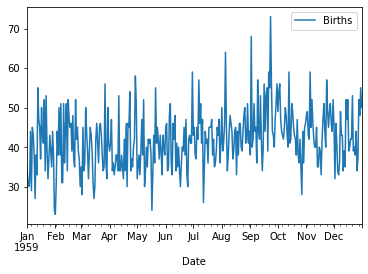

In [ ]:
dataset.plot()
plt.show()

dari plot diatas dapat dilihat sebenarnya terdapat sebuah pola / trend dari data tersebut namun karena data nya terlalu rapat jadi kurang terlihat jelas



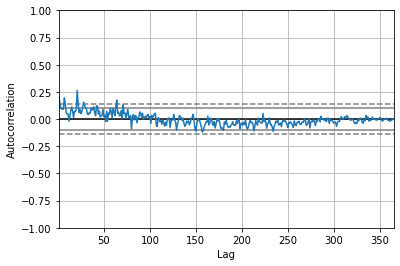

In [ ]:
pd.plotting.autocorrelation_plot(dataset)
plt.show()

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
model = ARIMA(dataset, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:               D.Births   No. Observations:                  364
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1245.037
Method:                       css-mle   S.D. of innovations              7.392
Date:                Fri, 18 Sep 2020   AIC                           2504.073
Time:                        00:37:07   BIC                           2531.353
Sample:                    01-02-1959   HQIC                          2514.916
                         - 12-31-1959                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0434      0.125      0.348      0.728      -0.201       0.288
ar.L1.D.Births    -0.7240      0.052    -13.976      0.000      -0.826      -0.622
ar.L2.D.Births    -0.5430      0.063

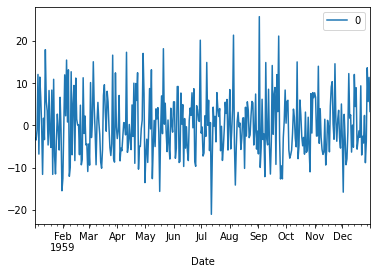

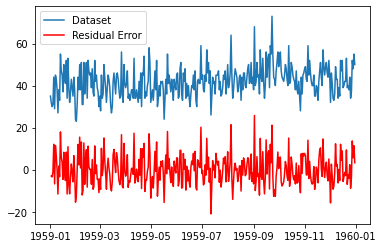

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

plt.plot(dataset)
plt.plot(residuals,  color='red')
plt.legend(['Dataset','Residual Error'])

In [ ]:
values = dataset.values
size = int(len(values) * 0.66) #0.66 persesan training set
train, test = values[0:size], values[size:len(values)]
history = [x for x in train]
predictions = []

for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	prediction = output[0]
	predictions.append(prediction)
	expected = test[t]
	history.append(expected)
	print('predicted=%f, expected=%f' % (prediction, expected))
error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)

predicted=43.164026, expected=51.000000
predicted=46.686556, expected=41.000000
predicted=45.779041, expected=44.000000
predicted=44.804408, expected=38.000000
predicted=42.180905, expected=68.000000
predicted=49.475299, expected=40.000000
predicted=48.075054, expected=42.000000
predicted=44.044629, expected=51.000000
predicted=47.323511, expected=44.000000
predicted=47.368185, expected=45.000000
predicted=48.860471, expected=36.000000
predicted=42.360363, expected=57.000000
predicted=46.650582, expected=44.000000
predicted=46.923718, expected=42.000000
predicted=44.240486, expected=53.000000
predicted=46.542111, expected=42.000000
predicted=45.976001, expected=34.000000
predicted=44.662097, expected=40.000000
predicted=42.112874, expected=56.000000
predicted=45.698052, expected=44.000000
predicted=45.295099, expected=53.000000
predicted=45.327316, expected=55.000000
predicted=47.714677, expected=39.000000
predicted=47.208313, expected=59.000000
predicted=51.509437, expected=55.000000


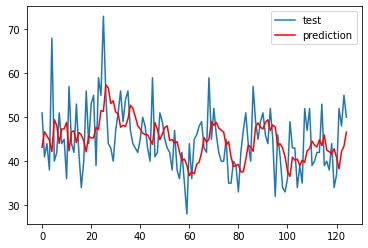

In [ ]:
plt.plot(test)
plt.plot(predictions, color='red')
plt.legend(['test','prediction'])
plt.show()

In [ ]:
# Courtesy of Jason Brownlee of Machine Learning Mastery
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order): #rolling forecast
	# prepare training dataset
	train_size = int(len(X) * 0.66)
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit(disp=0)
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	error = mean_squared_error(test, predictions)
	return error

# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					mse = evaluate_arima_model(dataset, order)
					if mse < best_score:
						best_score, best_cfg = mse, order
					print('ARIMA%s MSE=%.3f' % (order,mse))
				except:
					continue
	print('Best ARIMA%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
import warnings

p_values = range(0, 10)
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=67.063
ARIMA(0, 0, 1) MSE=62.165
ARIMA(0, 0, 2) MSE=60.386
ARIMA(0, 1, 0) MSE=84.038
ARIMA(0, 1, 1) MSE=56.653
ARIMA(0, 1, 2) MSE=55.272
ARIMA(0, 2, 0) MSE=246.414
ARIMA(0, 2, 1) MSE=84.659
ARIMA(1, 0, 0) MSE=60.876
ARIMA(1, 0, 1) MSE=57.058
ARIMA(1, 1, 0) MSE=65.928
ARIMA(1, 1, 1) MSE=55.129
ARIMA(1, 1, 2) MSE=55.192
ARIMA(1, 2, 0) MSE=143.755
ARIMA(2, 0, 0) MSE=59.251
ARIMA(2, 0, 1) MSE=55.075
ARIMA(2, 0, 2) MSE=55.452
ARIMA(2, 1, 0) MSE=59.487
ARIMA(2, 1, 1) MSE=55.012
ARIMA(2, 1, 2) MSE=55.248
ARIMA(2, 2, 0) MSE=107.600
ARIMA(3, 0, 0) MSE=59.177
ARIMA(3, 0, 1) MSE=55.463
ARIMA(3, 0, 2) MSE=55.896
ARIMA(3, 1, 0) MSE=57.467
ARIMA(3, 1, 1) MSE=55.592
ARIMA(3, 1, 2) MSE=56.350
ARIMA(3, 2, 0) MSE=89.749
ARIMA(4, 0, 0) MSE=59.189
ARIMA(4, 0, 1) MSE=61.291
ARIMA(4, 0, 2) MSE=55.867
ARIMA(4, 1, 0) MSE=57.428
ARIMA(4, 1, 1) MSE=55.862
ARIMA(4, 1, 2) MSE=55.570
ARIMA(4, 2, 0) MSE=80.207
ARIMA(5, 0, 0) MSE=58.919
ARIMA(5, 0, 1) MSE=58.344
ARIMA(5, 1, 0) MSE=57.931
ARIMA(5, 

**Pada Metode ARIMA, hasil terbaik yang didapat ada pada parameter p=6, d=1, q=0 dengan nilai MSE sebesar 53.187**

In [ ]:
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
# Courtesy of Jason Brownlee of Machine Learning Mastery
# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]

# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

# split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]

# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error

# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)

# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [6]
	d_params = [0, 1]
	q_params = [0, 1, 2]
	t_params = ['n','c','t','ct']
	P_params = [0, 1, 2]
	D_params = [0, 1]
	Q_params = [0, 1, 2]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models

In [ ]:
n_test = 8

# model configs
cfg_list = sarima_configs()

# grid search
scores = grid_search(dataset.values, cfg_list, n_test)
print('done')

# list top 3 configs
for cfg, error in scores[:3]:
  print(cfg, error)

 > Model[[(6, 0, 0), (0, 0, 0, 0), 'n']] 7.835
 > Model[[(6, 0, 0), (0, 0, 1, 0), 'n']] 7.265
 > Model[[(6, 0, 0), (0, 0, 2, 0), 'n']] 6.998
 > Model[[(6, 0, 0), (1, 0, 0, 0), 'n']] 7.667
 > Model[[(6, 0, 0), (1, 0, 1, 0), 'n']] 7.159
 > Model[[(6, 0, 0), (1, 0, 2, 0), 'n']] 7.229
 > Model[[(6, 0, 0), (2, 0, 0, 0), 'n']] 7.441
 > Model[[(6, 0, 0), (2, 0, 1, 0), 'n']] 7.066
 > Model[[(6, 0, 0), (0, 0, 0, 0), 'c']] 7.443
 > Model[[(6, 0, 0), (2, 0, 2, 0), 'n']] 7.020
 > Model[[(6, 0, 0), (0, 0, 1, 0), 'c']] 7.450
 > Model[[(6, 0, 0), (0, 0, 2, 0), 'c']] 7.400
 > Model[[(6, 0, 0), (1, 0, 0, 0), 'c']] 7.390
 > Model[[(6, 0, 0), (1, 0, 1, 0), 'c']] 7.412
 > Model[[(6, 0, 0), (1, 0, 2, 0), 'c']] 7.254
 > Model[[(6, 0, 0), (2, 0, 0, 0), 'c']] 7.245
 > Model[[(6, 0, 0), (2, 0, 1, 0), 'c']] 7.471
 > Model[[(6, 0, 0), (0, 0, 0, 0), 't']] 7.667
 > Model[[(6, 0, 0), (2, 0, 2, 0), 'c']] 7.442
 > Model[[(6, 0, 0), (0, 0, 1, 0), 't']] 7.240
 > Model[[(6, 0, 0), (0, 0, 2, 0), 't']] 7.056
 > Model[[(6,

pada model SARIMA berdasarkan nilai RMSE didapatkan hasil terbaik [(6, 1, 2), (0, 0, 1, 0), 't'] 6.54926322386077
 dengan lag(**p**) bernilai 6, **d** bernilai 1, **q** bernilai 2 untuk autoregression.
sedangkan untuk seasonal nya dengan parameter **Q** bernilai 1, dan **P**, **D**, **m** bernilai 0

Untuk Metode SARIMA, nilai terbaik yang didapat yaitu pada p=6, d=1, q=2 untuk auto regressionnya, untuk seasonalnya ada pada P=0, Q=1, D dan M = 0

Setelah membandingkan ARIMA dan SARIMA, dapat disimpulkan jika SARIMA lebih baik digunakan untuk data birth ini, dan juga dapat kita lihat pada diagram bahwa diagram membentuk trend